In [1]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
X, y = make_classification(
    n_samples=100,
    n_classes=2,
    n_features=4,
    n_clusters_per_class=1,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=42
)

In [3]:
dataset = {
"age": [20,21,22,23,24,25,26,27,np.nan,29,30],
"height": [170,171,172,np.nan,174,175,176,np.nan,178,179,180],
"bgi": [10,20,30,40,50,60,70,80,90,np.nan, 100]
}

In [4]:
X = pd.DataFrame(data=X)
X = X.dropna()
X.head()

,0,1,2,3
0,0.155592,-0.213447,-0.718444,0.140962
1,2.548817,0.401712,-0.108760,2.502258
2,0.739028,0.791663,1.158111,0.821807
3,0.769169,-1.435862,1.441273,-1.060967
4,1.431174,0.852433,-0.661786,-0.708083


In [5]:
X_scalar = MinMaxScaler().fit_transform(X)
y = pd.DataFrame(X_scalar).iloc[:, 2]
X_scalar = pd.DataFrame(X_scalar).iloc[:, :2]
X_scalar
y

0     0.454078
1     0.563814
2     0.791835
3     0.842801
4     0.464276
        ...   
95    0.977527
96    0.440745
97    0.600847
98    0.967310
99    0.579967
Name: 2, Length: 100, dtype: float64

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X_scalar, y, random_state=42, test_size=0.3)
pd.DataFrame(y_train)

,2
11,0.737758
47,0.497905
85,0.435399
28,0.717893
93,0.647648
...,...
60,0.706133
71,0.322751
14,0.436119
92,0.811418


In [7]:
classifier = LinearRegression().fit(x_train, y_train)
y_pred = classifier.predict(x_test)


In [8]:
mean_squared_error(y_test, y_pred)

0.021745023539811184

# MSE From Scratch

In [9]:
np.mean((y_test - y_pred) ** 2)

0.021745023539811184

In [10]:
r2_score(y_test, y_pred)

0.008626586238452694

# R2 From Scratch

In [11]:
y_diff_avg = np.mean(y_test - y_pred)
rss = np.mean((y_test - y_pred - y_diff_avg) ** 2)
y_true_test_avg = np.mean(y_test)
tss = np.mean((y_test - y_true_test_avg) ** 2)

1 - (rss / tss)

0.08555732240629388

In [12]:
mean_absolute_error(y_test, y_pred)

0.12491710213187769

# MAE From Scratch

In [13]:
np.mean(np.abs(y_test - y_pred))

0.12491710213187769

In [14]:
y_test

83    0.406729
53    0.603821
70    0.792745
45    0.454643
44    0.562773
39    0.579627
22    0.434180
80    0.545930
10    0.818360
0     0.454078
18    0.623723
30    0.745306
73    0.641735
33    0.477311
90    0.591592
4     0.464276
76    0.663271
77    0.544209
12    0.201113
31    0.498608
55    0.597033
88    0.345763
26    0.537930
42    0.813354
69    0.731954
15    0.600970
40    0.868853
96    0.440745
9     0.432249
72    0.580057
Name: 2, dtype: float64

<Axes: xlabel='2'>

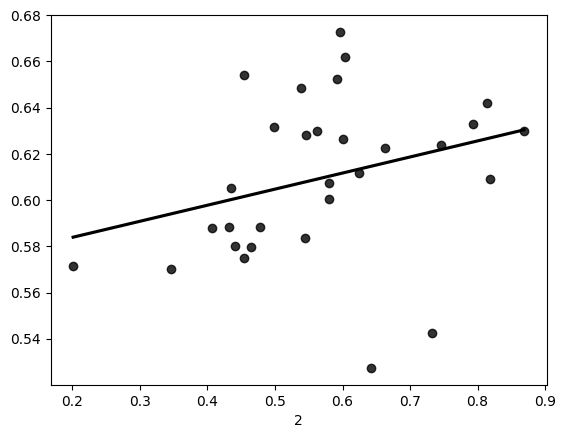

In [15]:
sns.regplot(x=y_test, y=y_pred, ci=None, data=X_scalar, color='black')